In [94]:
import random as rd    

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация ДСВ.

Будем генерировать следующие функции распределения:
<ul>
<li>
Распределение Пуассона p(x = k) = a^k / k! * e^(-a), в качестве a выберем 1, число исходов - 100
</li>
<li>
B(n, p) // Биноминальное распределение n = 1000 (совпадает с числом исходов), p = 0,75
</li>
<li>
Логарифмическое распределение с p = 0.9, экспериментов - 100
</li>
<li>
Геометрическое распределение (число экспериментов до первого успеха) с p = 0.01, n = 1000
</li>
</ul>

Часть этих распределений определены для бесконечного промежутка, т.е хвост распределения может быть немного перегружен. Поэтому для них выбраны параметры, минимизирующие количество вариантов, попадающих в  хвост

In [78]:
import math

def generate_drv_weights_puasson(n, a):
    def puasson(k, a1):
        return a1 ** k / float(math.factorial(k)) * math.exp(-a1)
    sp = [puasson(i, a) for i in range(n)]
    s = sum(sp)
    return list(map(lambda x : x / s, sp))

In [79]:
def generate_drv_binomial(n, p):
    def binomial(n1, k, p1):
        def binom(n, k):
            return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
        return binom(n1, k) * p**k * (1-p)**(n1 - k)
    sp = [binomial(n, i, p) for i in range(n)]
    s = sum(sp)
    return list(map(lambda x : x / s, sp))

In [80]:
def generate_drv_log(n, p):
    def log_f(p, k):
        return -1.0 / math.log(1 - p) * p**k / k
    sp = [log_f(p, i) for i in range(1, n)]
    s = sum(sp)
    return list(map(lambda x : x / s, sp))

In [81]:
def generate_drv_geom(n, p):
    sp = [p*(1-p)**(i-1) for i in range(1,n)]
    s = sum(sp)
    return list(map(lambda x : x / s, sp))

In [82]:
drv1 = generate_drv_weights_puasson(100, 1)
drv2 = generate_drv_binomial(1000, 0.75)
drv3 = generate_drv_log(100, 0.9)
drv4 = generate_drv_geom(1000, 0.01)

Нормировка проводилась по единственной причине - ошибки округления делали сумму составляющих функции плотности распределения слегка < 1

Переменные drvX содержат информацию о соотв. функциях распределения. После генерации распределение сгенерированных величин должно быть похожим на них

In [91]:
def generate_drv_simple(drvDistr):
    r = rd.random()
    i = 0
    cumSum = drvDistr[0]
    while r > cumSum:
        cumSum += drvDistr[i + 1]
        i += 1
    return i

In [160]:
def generate_drvs(drvDistr, n, gen_func):
    drvDistrGen = [0] * len(drvDistr)
    for _ in range(n):
        drvDistrGen[gen_func(drvDistr)] += 1
    return drvDistrGen

In [125]:
import pylab as py
import time

In [161]:
start = time.time()
drv1_gen_basic = generate_drvs(drv1, 1000000, generate_drv_simple)
print(str(time.time() - start) + "s. passed")

0.527411699295044s. passed


In [142]:
def plot_2_plots(pl1, pl2):
    py.figure(2)
    py.subplot(211)
    py.plot(pl1)
    py.ylabel("Probability")
    py.title("distribition")
    py.subplot(212)
    py.title("hist")
    py.ylabel("Hits")
    py.plot(pl2)

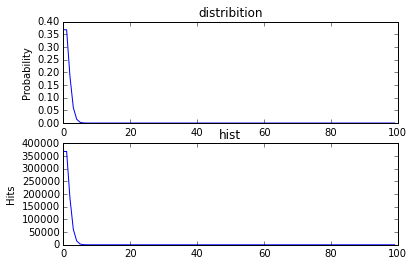

In [162]:
plot_2_plots(drv1, drv1_gen_basic)

In [196]:
start = time.time()
drv2_gen_basic = generate_drvs(drv2, 100000, generate_drv_simple)
print(str(time.time() - start) + "s. passed")

15.806460618972778s. passed


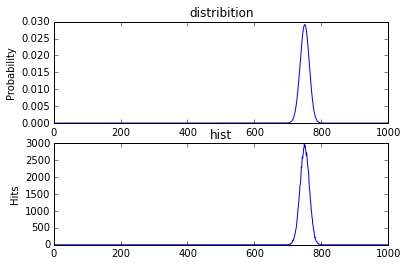

In [147]:
plot_2_plots(drv2, drv2_gen_basic)

In [155]:
start = time.time()
drv3_gen_basic = generate_drvs(drv3, 1000000, generate_drv_simple)
print(str(time.time() - start) + "s. passed")

0.8880496025085449s. passed


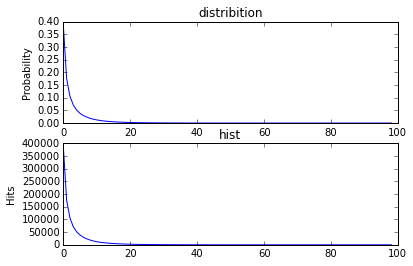

In [156]:
plot_2_plots(drv3, drv3_gen_basic)

In [157]:
start = time.time()
drv4_gen_basic = generate_drvs(drv4, 1000000, generate_drv_simple)
print(str(time.time() - start) + "s. passed")

18.824209928512573s. passed


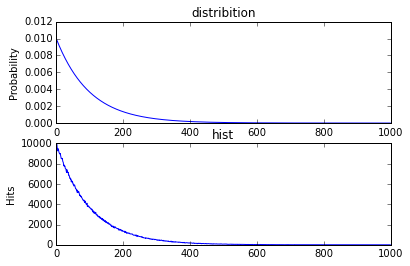

In [158]:
plot_2_plots(drv4, drv4_gen_basic)

Сравнивая графики во всех случаях ясно, что получившийся алгоритм срабатывает довольно неплохо (при большем количестве исходов (1000) видны небольшие зубцы, которые можно побороть увеличив количество генераций дсв)

### Добавим в расчёт бинарный поиск

In [208]:
from bisect import bisect_left

In [184]:
def cumSum(distr):
    res = [0.0] * len(distr)
    sum1 = 0.0
    for i,v in enumerate(distr):
        sum1 += v
        res[i] = sum1
    return res

In [209]:
def gen_drv_bisect(drvDistr):
    return bisect_left(drvDistr, rd.random())

In [210]:
start = time.time()
drv1_gen_bisect = generate_drvs(cumSum(drv1), 1000000, gen_drv_bisect)
print(str(time.time() - start) + "s. passed")

0.6193902492523193s. passed


Результат сравним с первым запуском, т.к. максимальные значения тут невелики и расчёт прерывается после первых нескольких операций суммирования. 

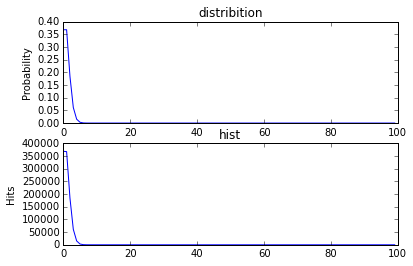

In [211]:
plot_2_plots(drv1, drv1_gen_bisect)

Уже по первому графику ясно, что результат получился тот-же, поэтому дальше я просто сравню разультаты по времени

In [197]:
start = time.time()
drv2_gen_bisect = generate_drvs(cumSum(drv2), 100000, gen_drv_bisect)
print(str(time.time() - start) + "s. passed")

0.08807611465454102s. passed


Вот, сразу виден результат! В случае с простым алгоритмом это работало около 15 секунд. В последний раз убедимся что при этом с распределением всё ок

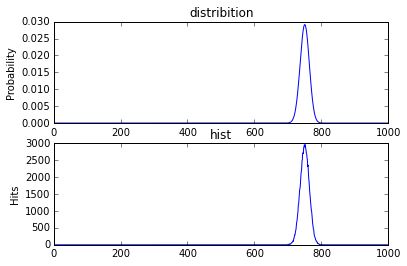

In [199]:
plot_2_plots(drv2, drv2_gen_bisect)

In [200]:
start = time.time()
drv3_gen_bisect = generate_drvs(cumSum(drv3), 1000000, gen_drv_bisect)
print(str(time.time() - start) + "s. passed")

0.6083593368530273s. passed


In [201]:
start = time.time()
drv4_gen_bisect = generate_drvs(cumSum(drv4), 1000000, gen_drv_bisect)
print(str(time.time() - start) + "s. passed")

0.7387864589691162s. passed


Заметно, что алгоритм с бинарным поиском справляется примерно так же как простой на малых размерностях, но сильно выигрыват при увеличении размерности хотя бы до 1000

### Алгоритм с заполнением прямоугольника n x (1 / n)

В стандартном питоне нет аналога < set > (быстрый поиск максимума / минимума и модификация элемента), поэтому предоботка будет немного неоптимальна

In [316]:
def generate_distr_array(distr):
    enum = list(map(lambda x: list(x), enumerate(distr)))
    N = len(enum)
    res = []# each node struct [[value, barrier],[value, 1.0]]
    i = 0
    while len(enum) > 0:
        mi = min(enum, key=lambda x: x[1])
        indexMi = enum.index(mi)
        enum.pop(indexMi)
        res.append([])
        res[i].append(mi)
        inversedN = 1.0 / N
        spaceLeft = inversedN - mi[1]
        if spaceLeft > 0.0 and len(enum) > 0:
            ma = max(enum, key=lambda x: x[1])
            indexMa = enum.index(ma)
            ma[1] -= spaceLeft
            if ma[1] <= 0.0:
                enum.pop(indexMa)
            res[i].append([ma[0], spaceLeft])
        s = sum(list(map(lambda x: x[1], res[i])))
        ss = 0
        for item in res[i]:
            item[1] /= s
            ss += item[1]
            item[1] = ss
        i += 1
    return res

In [328]:
def gen_2_rand_from_2():
    return (rd.random(), rd.random())

def gen_2_rand_from_1():
    r = rd.random()
    r *= 10**8
    fp = int(r)
    return (fp / float(10**8), (r - fp))

In [343]:
def gen_distr_common(drvDistr, rand1, rand2):
    idx = int(rand1 * len(drvDistr))
    if drvDistr[idx][0][1] > rand2:
        return drvDistr[idx][0][0]
    else:
        return drvDistr[idx][1][0]    

def gen_distr_from_2_rand(drvDistr):
    rands = gen_2_rand_from_2()
    return gen_distr_common(drvDistr, rands[0], rands[1])


def gen_distr_from_1_rand(drvDistr):
    rands = gen_2_rand_from_1()
    return gen_distr_common(drvDistr, rands[0], rands[1])

In [350]:
start = time.time()
drv1_gen_array = generate_drvs(generate_distr_array(drv1), 1000000, gen_distr_from_2_rand)
print(str(time.time() - start) + "s. passed")

1.0303895473480225s. passed


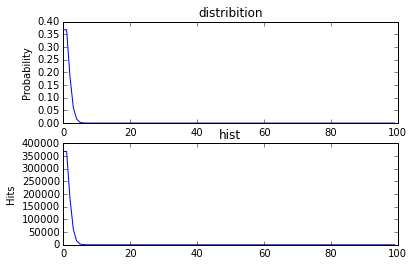

In [351]:
plot_2_plots(drv1, drv1_gen_array)

In [352]:
start = time.time()
drv1_gen_array_1 = generate_drvs(generate_distr_array(drv1), 1000000, gen_distr_from_1_rand)
print(str(time.time() - start) + "s. passed")

1.5282912254333496s. passed


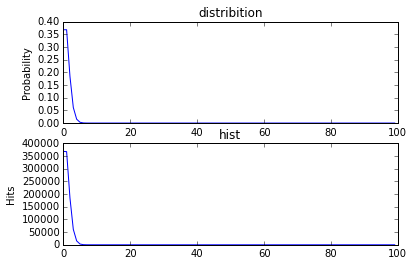

In [359]:
plot_2_plots(drv1, drv1_gen_array_1)

Выводы, которые можно сделать по 1му же графику - по времени в таком случае мы проиграли предыдущим алгоритмам (т.к. строили 1 раз массив n x 1/n с довольно большой константой) На больших размерностях влияние времени построения массива нивелируется и получим более адекватный результат по времени выполнения. Что касается корректности решения - сравнение графиков показывает, что всё верно и проблем с использованием 1 СВ вместо 2 не наблюдается.

In [356]:
start = time.time()
drv2_gen_array = generate_drvs(generate_distr_array(drv2), 100000, gen_distr_from_2_rand)
print(str(time.time() - start) + "s. passed")

0.2891087532043457s. passed


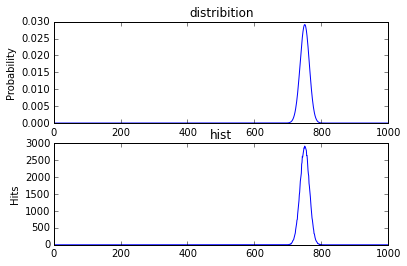

In [357]:
plot_2_plots(drv2, drv2_gen_array)

In [358]:
start = time.time()
drv2_gen_array_1 = generate_drvs(generate_distr_array(drv2), 100000, gen_distr_from_1_rand)
print(str(time.time() - start) + "s. passed")

0.3475914001464844s. passed


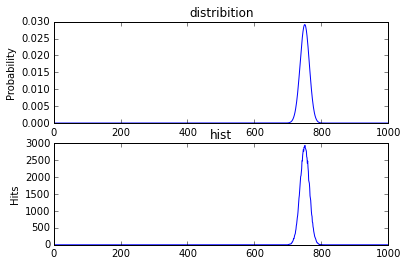

In [360]:
plot_2_plots(drv2, drv2_gen_array_1)

Мы всё равно проиграли алгоритму с бинарным поиском (за счёт константы), так стоит произвести сравнение только части, отвечающей за саму генерацию

In [362]:
start = time.time()
drv3_gen_array_1 = generate_drvs(generate_distr_array(drv3), 1000000, gen_distr_from_1_rand)
print(str(time.time() - start) + "s. passed")

1.5260062217712402s. passed


Все графики приводить не буду, кажется, что корректность решения видна

In [367]:
start = time.time()
drv4_gen_array_1 = generate_drvs(generate_distr_array(drv4), 1000000, gen_distr_from_1_rand)
print(str(time.time() - start) + "s. passed")

1.771045446395874s. passed


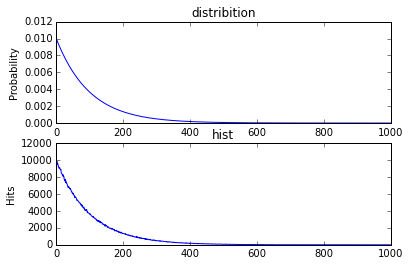

In [368]:
plot_2_plots(drv4, drv4_gen_array_1)

А теперь сравнение, о котором говорилось выше, сравним все 3 алгоритма после пред-обработки на drv4

In [369]:
start = time.time()
drv4_gen_basic = generate_drvs(drv4, 1000000, generate_drv_simple)
print(str(time.time() - start) + "s. passed")

18.502888441085815s. passed


In [370]:
cs = cumSum(drv4)
start = time.time()
drv4_gen_bisect = generate_drvs(cs, 1000000, gen_drv_bisect)
print(str(time.time() - start) + "s. passed")

0.7255489826202393s. passed


In [372]:
ar = generate_distr_array(drv4)
start = time.time()
drv4_gen_array_1 = generate_drvs(ar, 1000000, gen_distr_from_2_rand)
print(str(time.time() - start) + "s. passed")

1.0693888664245605s. passed


Всё равно получилось немного дольше, хотя порядки величин сравнимые. Можно попробовать посетовать на малую размерность массива (1000 элементов log(1000) < 10) так что решение с бинарным поиском в таком случае за счёт скрытой константы и кеш промахов могло быть и быстрее. Ещё нюанс в том, что замеры я делал в ipython notebook запущенном в virtualenv (а он в целом у меня какой-то тормозной).